## In-class Practice 16

### 1. The S-E-I-R Model for Infectious Disease

The S-E-I-R model of epidemics has four populations:

- S[n]: Susceptible, which means anyone in the gould could be exposed to the virus
- E[n]: exposed, which means people get exposed but no symptoms yet (incubation)
- I[n]: infected, which is the group of people who's already ill 
- R[n]: removed, which denotes people recovered from the illness and immuned (removed from all the populations)

The parameters used in an S-E-I-R model include:

- $\lambda$: contact rate, which creates newly exposed through $\lambda\cdot I \cdot S$
- $\sigma$: incubation rate, which creates new infection through $\sigma\cdot E$ and equals $1/T_{inc}$, where $T_{inc}$ is the incubation period
- $\gamma$: recovered rate, which removes $\gamma\cdot I$ from the infected population


#### 1.a) Based on the discussions of the S-I-R model in the lecture notes, now extend the model to S-E-I-R by introducing a new population $E[n]$ with the parameter new $\sigma$. First write down the reccurence relation for S, E, I and R;

The recurrence relation for S, E, I and R is:

$$S[n+1] = S[n] - \lambda\cdot I[n]\cdot S[n]\;\;\;\;\;\;\;\;\;\;\;\; \;\;\;$$
$$E[n+1] = E[n] + \lambda\cdot I[n]\cdot S[n] - \sigma\cdot E[n]$$
$$I[n+1] = I[n] + \sigma\cdot E[n] - \gamma\cdot I[n]\;\;\;\;\;\;\;\;\;$$
$$R[n+1] = R[n] + \gamma\cdot I[n]\;\;\;\;\;\;\;\;\;\;\;\; \;\;\;\;\;\;\;\; \;\;\;$$

The assumption here is that the exposed population are not contagious - the only way of creating new infection is through contact between I and S.

#### 1.b) Show that the total number of population in the S-E-I-R model does not change with time, e.g., S+E+I+R = constant;

If we sum over the left hand side (LHS) of the above four equations, you get:

$$LHS = S[n+1]+E[n+1]+I[n+1]+R[n+1]$$

Now let's sum over the right hand side (RHS) of the above four equations, you get:

$$RHS = S[n]+E[n]+I[n]+R[n]$$

Which is saying that the total number of population, defined as S+E+I+R does not change between day n and day n+1. In that sense, we say S+E+I+R = constant

#### 1.c) Implement the S-E-I-R model using Python, and plot the S, E, I and R curves as a function of time (days) using the following two sets of parameters:
- $\lambda = 0.5$, $\gamma = 0.08$, $T_{inc} = 4$ ($\sigma = 1/T_{inc}$);
- $\lambda = 0.15$, $\gamma = 0.22$, $T_{inc} = 12$ ($\sigma = 1/T_{inc}$);

Visualize the results and describe the difference you find in the model results.

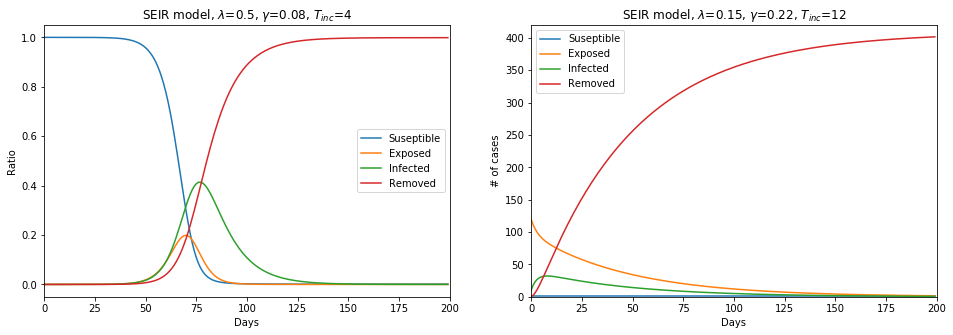

In [14]:
# Since I'm gonna use the SEIR model multiple times, I'm packing it into a function
import matplotlib.pyplot as plt
import numpy as np

def SEIR(N,T,lamda,gamma,incubation,I0):

    """ This is a function evolves the S-E-I-R model for epidemic dynamics
        INPUT:  N          (total population, integer)
                T          (simulation days, integer)
                lamda      (contact rate, float)
                gamma      (recover rate, float)
                incubation (incubation period, integer)
                I0         (Initial infections)
        OUTPUT: S (array of susceptible, length T)
                E (array of exposed)
                I (array of infected)
                R (array of removed)
        Assumptions: E is not contagious
                     the only way of creating new infection is through contact between I and S
        Algorithm: 
                     s[n + 1] = s[n] - lamda * s[n] * i[n]
                     e[n + 1] = e[n] + lamda * s[n] * i[n] - sigma * e[n]
                     i[n + 1] = i[n] + sigma * e[n] - gamma * i[n]
                     r[n + 1] = r[n] + gamma * i[n]
    """

    # susceptiable ratio
    s = np.zeros([T])
    # exposed ratio
    e = np.zeros([T])
    # infective ratio
    i = np.zeros([T])
    # remove ratio
    r = np.zeros([T])
    
    sigma = 1/incubation

    i[0] = I0/N # initial infecitve ratio
    s[0] = 1.0  # initial susceptible is always assumed to be 100%
    e[0] = (incubation*I0)/N # initial incubation ratio - assuming E/I = incubation
    r[0] = 0.0
    
    for t in range(T-1):
        s[t + 1] = s[t] - lamda * s[t] * i[t]
        e[t + 1] = e[t] + lamda * s[t] * i[t] - sigma * e[t]
        i[t + 1] = i[t] + sigma * e[t] - gamma * i[t]
        r[t + 1] = r[t] + gamma * i[t]
    
    return s,e,i,r
    
# now let's call the function and generate plots for analysis    
# total population
N = 1e7
# simuation Time / Day
T = 200
# initial infections
I0= 10

plt.figure(figsize=(16,5))

plt.subplot(1,2,1) # first set of parameters, subplot 1
# contact rate
lamda = 0.5
# recover rate
gamma = 0.08
# incubation period
incubation = 4
# call the SEIR model based on tbe given parameters
s,e,i,r = SEIR(N,T,lamda,gamma,incubation,I0) 
# generate plots
day = np.arange(T)
plt.plot(day,s,label='Suseptible')
plt.plot(day,e,label='Exposed')
plt.plot(day,i,label='Infected')
plt.plot(day,r,label='Removed')
plt.xlabel('Days')
plt.xlim([0,T])
plt.ylabel('Ratio')
plt.title('SEIR model, $\lambda$='+str(lamda)+', $\gamma$='+str(gamma)+', $T_{inc}$='+str(incubation))
plt.legend()

plt.subplot(1,2,2) # second set of parameters, subplot 2
# contact rate
lamda = 0.15
# recover rate
gamma = 0.22
# incubation period
incubation = 12
# call the SEIR model based on tbe given parameters
s,e,i,r = SEIR(N,T,lamda,gamma,incubation,I0) 
# generate plots
day = np.arange(T)
plt.plot(day,s,label='Suseptible')
plt.plot(day,e*N,label='Exposed')
plt.plot(day,i*N,label='Infected')
plt.plot(day,r*N,label='Removed')
plt.xlabel('Days')
plt.xlim([0,T])
plt.ylim([0,420])
plt.ylabel('# of cases')
plt.title('SEIR model, $\lambda$='+str(lamda)+', $\gamma$='+str(gamma)+', $T_{inc}$='+str(incubation))
plt.legend()
plt.show()

**Interpretation**: In the first set of parameter, the SEIR model gives typical evolution curves of an epidemic, with peak infection occurs around day 75 which is determined by the contact and removal rate; however, in the second set of parameters, the infection goes up to 30 and drops to 0 as time goes on, which shows there's no epidemic in this case. The reason can be seen from the equation of the S-I-R model of I[n]:

$$\Delta I = I[n+1] - I[n] = \lambda\cdot I[n]\cdot S[n] - \gamma\cdot I[n] = I[n]\cdot\left(\lambda\cdot S[n] - \gamma\right)$$

In the beginning of an epidemic ($n=0$), so the increase in the infection ($\Delta I$) is calculated as:

$$\Delta I = I_0(\lambda S_0 - \gamma)$$

Since $S_0 = 1$ (100% susceptible), you can see that as long as $\lambda - \gamma<0$, the increase in the infection ($\Delta I$) is negative - which means the infectious diseases will not spread! In other words, $\lambda$ is the rate of introducing new infections while $\gamma$ is the rate of removing existing infections, when you're removing patients faster than the generation, you basically stops the spreading of the infectious disease. 

#### 1.d) Show the relationship between the incubation period $T_{inc}$ and the peak value of the infection curve $I[n]$, given $\lambda = 0.5$, $\gamma = 0.08$, e.g., you're generating a plot with $T_{inc}$ as the horizontal axis and peak value of $I[n]$ as the vertical axis.

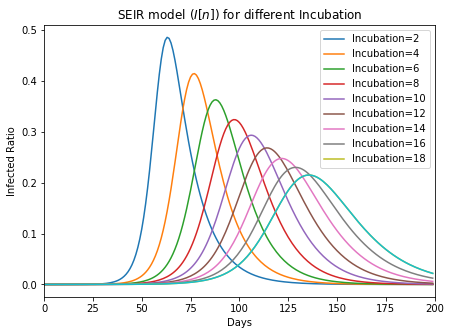

In [2]:
# total population
N = 1e7
# simuation Time / Day
T = 200
# initial infections
I0= 10
day = np.arange(T)

# contact rate
lamda = 0.5
# recover rate
gamma = 0.08
# incubation period
incubation = np.arange(2,20,2)

plt.figure(figsize=(7,5))
# call the SEIR model based using all the values in "incubation"
for incu in incubation:
    s,e,i,r = SEIR(N,T,lamda,gamma,incu,I0) 
    plt.plot(i,label='Incubation='+str(incu))
    
plt.legend()
plt.plot(day,i,label='Infected')
plt.xlabel('Days')
plt.xlim([0,T])
plt.ylabel('Infected Ratio')
plt.title('SEIR model ($I[n]$) for different Incubation')
plt.show()

Now let's work out the relationship between incubation and peak infection

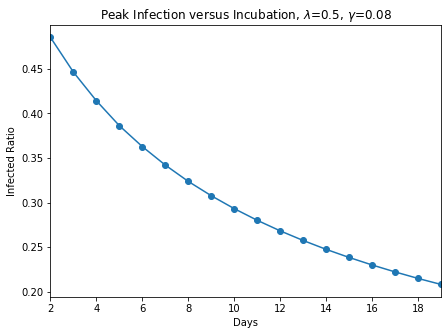

In [3]:
# incubation period
incubation = np.arange(2,20,1)
peak = [] # a list storing the peak values for each incubation element

# call the SEIR model based using all the values in "incubation"
for incu in incubation:
    s,e,i,r = SEIR(N,T,lamda,gamma,incu,I0) 
    peak.append(i.max())

plt.figure(figsize=(7,5))
plt.plot(incubation,peak,'-o')
plt.xlabel('Days')
plt.xlim([incubation[0],incubation[-1]])
plt.ylabel('Infected Ratio')
plt.title('Peak Infection versus Incubation, $\lambda$='+str(lamda)+', $\gamma$='+str(gamma))
plt.show()